In [1]:
import gpytorch.kernels as kernel
import torch
import numpy as np
from src.test_statistics import *
from src.data import *
import random
import numpy as np
from src.test import *

In [2]:
X_ker = kernel.RBFKernel()
Y_ker = kernel.RBFKernel()

In [3]:
X_ker

RBFKernel(
  (raw_lengthscale_constraint): Positive()
)

In [4]:
n=100
X = torch.randn((n,2))
Y = torch.randn(n)
T = (torch.randn((n))>0).float()

In [5]:
a =torch.tensor([1,1],dtype=float) 

In [6]:
data_train = Data_object(X,Y,T)
data_train_flip = Data_object(X,Y,1-T)

In [7]:
m= 200
X = torch.randn((m,2))
Y = torch.randn(m)
T = (torch.randn((m))>0).float()

In [8]:
Y1 = torch.randn((1))

In [9]:
data_test = Data_object(X,Y,T)
data_test_flip = Data_object(X,Y,1-T)

In [10]:
W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),1,func="cme")
W1 = get_W_matrix(Y_ker(data_train.X1).evaluate(),1,func="cme")

In [11]:
weights = 1/2*torch.ones(m)

In [12]:
K = ker(X_ker)
L = ker(Y_ker)

In [13]:
c = (data_test.T - weights)/(weights*(1-weights))
c

tensor([-2.,  2.,  2., -2.,  2.,  2.,  2., -2., -2.,  2.,  2.,  2.,  2., -2.,
         2.,  2.,  2., -2., -2.,  2., -2., -2.,  2., -2., -2., -2., -2.,  2.,
        -2.,  2.,  2., -2.,  2.,  2., -2., -2., -2.,  2.,  2., -2.,  2.,  2.,
         2., -2., -2.,  2., -2., -2.,  2., -2., -2.,  2., -2., -2., -2., -2.,
        -2.,  2.,  2.,  2.,  2.,  2., -2.,  2.,  2., -2., -2.,  2.,  2.,  2.,
         2.,  2., -2.,  2.,  2.,  2.,  2.,  2., -2.,  2.,  2.,  2., -2.,  2.,
         2.,  2., -2., -2., -2.,  2.,  2., -2., -2., -2., -2.,  2.,  2.,  2.,
         2., -2., -2.,  2., -2., -2., -2.,  2.,  2.,  2., -2., -2., -2.,  2.,
         2.,  2.,  2., -2.,  2.,  2., -2.,  2.,  2.,  2.,  2., -2., -2.,  2.,
         2.,  2., -2., -2.,  2.,  2.,  2.,  2.,  2.,  2., -2., -2., -2., -2.,
         2., -2.,  2.,  2., -2., -2., -2., -2., -2.,  2., -2.,  2., -2., -2.,
        -2., -2., -2.,  2., -2.,  2.,  2., -2., -2., -2., -2., -2.,  2.,  2.,
        -2.,  2., -2., -2.,  2.,  2., -2., -2., -2., -2.,  2., -

In [14]:
data_train.Y.shape

torch.Size([100])

In [15]:
L(data_train.Y0,data_train.Y).shape

torch.Size([43, 100])

In [16]:
DATE_test_stat(data_train,data_test,X_ker,Y_ker,weights,W0,W1)

0.015152005478739738

In [17]:
DETT_test_stat(data_train,data_test,X_ker,Y_ker,weights,W1)

0.0037764343433082104

In [18]:
c

tensor([-2.,  2.,  2., -2.,  2.,  2.,  2., -2., -2.,  2.,  2.,  2.,  2., -2.,
         2.,  2.,  2., -2., -2.,  2., -2., -2.,  2., -2., -2., -2., -2.,  2.,
        -2.,  2.,  2., -2.,  2.,  2., -2., -2., -2.,  2.,  2., -2.,  2.,  2.,
         2., -2., -2.,  2., -2., -2.,  2., -2., -2.,  2., -2., -2., -2., -2.,
        -2.,  2.,  2.,  2.,  2.,  2., -2.,  2.,  2., -2., -2.,  2.,  2.,  2.,
         2.,  2., -2.,  2.,  2.,  2.,  2.,  2., -2.,  2.,  2.,  2., -2.,  2.,
         2.,  2., -2., -2., -2.,  2.,  2., -2., -2., -2., -2.,  2.,  2.,  2.,
         2., -2., -2.,  2., -2., -2., -2.,  2.,  2.,  2., -2., -2., -2.,  2.,
         2.,  2.,  2., -2.,  2.,  2., -2.,  2.,  2.,  2.,  2., -2., -2.,  2.,
         2.,  2., -2., -2.,  2.,  2.,  2.,  2.,  2.,  2., -2., -2., -2., -2.,
         2., -2.,  2.,  2., -2., -2., -2., -2., -2.,  2., -2.,  2., -2., -2.,
        -2., -2., -2.,  2., -2.,  2.,  2., -2., -2., -2., -2., -2.,  2.,  2.,
        -2.,  2., -2., -2.,  2.,  2., -2., -2., -2., -2.,  2., -

In [19]:
L(data_train.Y0,data_test.Y)@ c

tensor([-8.4017e+00,  2.3537e-02,  1.3832e+01,  1.9980e+01, -1.3306e+00,
        -4.0524e+00,  1.1351e+01,  2.0761e+01, -8.2341e+00,  2.0355e+01,
        -2.5271e+00,  2.0676e+01, -1.4170e+00,  1.1776e+01, -7.3207e+00,
        -2.3521e+00,  1.4032e+01, -8.7846e+00, -6.8615e+00, -8.5608e-02,
         1.9616e+01,  2.0533e+01,  2.0355e+01,  1.8485e-02,  1.1773e+01,
        -5.3726e+00, -8.3679e-01,  7.5394e+00, -5.9495e+00,  2.0797e+01,
         6.1121e+00,  1.7166e+01,  1.3662e+01,  1.0702e+01, -1.7054e+00,
         2.0739e+01, -6.4530e+00,  1.8925e+01, -3.2926e+00,  1.8880e+01,
         7.3113e+00, -5.6261e+00,  8.0677e+00], grad_fn=<MvBackward0>)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
weights_model = LogisticRegression()

In [22]:
weights_model.fit(data_train.X,data_train.T)
weights_train = weights_model.predict_proba(data_train.X)[:,1]
weights_test = weights_model.predict_proba(data_test.X)[:,1]

In [23]:
result_dict = kernel_permutation_test(data_train,data_test,X_ker,Y_ker,weights_model,test_stat="DETT",n_bins=10,n_permutations=100,reg=1)

In [24]:
g = lambda X: X[:,0]**2 + X[:,1] 

mu = torch.tensor([0,0.5])
sigma = ["ID"]
g_0 = g
g_1 = g
noise = 0.1
n_sample =100

In [25]:
a = shift_data_simulation(mu,sigma,g_0,g_1,noise,n_sample)

/Users/jakefawkes/Python/DR_distributional_test/src/data.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = torch.tensor(mu)


In [26]:
import yaml
import src.data as data

In [27]:
f = getattr(data,"shift_data_simulation")

In [28]:
with open("/Users/jakefawkes/Python/DR_distributional_test/config/run_simulated_shift_experiment.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [29]:
cfg

{'experiment': {'n_iter': 30,
  'test_stat': ['DATE', 'DETT'],
  'ker_regress': ['cme', 'zero'],
  'weights_model': 'Logistic_Regression',
  'X_ker': 'RBF',
  'Y_ker': 'RBF',
  'significance_level': 0.05,
  'n_bins': 20,
  'cme_reg': 0.01,
  'permute_weights': True,
  'KMM_weights': True},
 'data': {'generator': 'shift_data_simulation',
  'n_train_sample': 200,
  'n_test_sample': 200,
  'arguments': {'mu': [0.1, 0.1, 0.1, 0, 0, 0],
   'sigma': ['C_ID', 1.5],
   'noise': 0.2},
  'functions': {'g_0': 'f_3', 'g_1': 'f_4'}}}

In [30]:
def make_data(cfg):
    if cfg["data"]["generator"] == "shift_data_simulation":
        function_dict = {}
        for key in cfg["data"]["functions"]:
            function_dict[key] = getattr(data,cfg["data"]["functions"][key])
    data_train = shift_data_simulation(n_sample=cfg["data"]["n_train_sample"],**function_dict,**cfg["data"]["arguments"])
    data_test = shift_data_simulation(n_sample=cfg["data"]["n_test_sample"],**function_dict,**cfg["data"]["arguments"])
    return data_train,data_test

In [31]:
make_data(cfg)

(<src.data.Data_object at 0x7ff473cc2970>,
 <src.data.Data_object at 0x7ff47659dca0>)

In [32]:
function_dict = {}
for key in cfg["data"]["functions"]:
    function_dict[key] = getattr(data,cfg["data"]["functions"][key])

In [33]:
a = shift_data_simulation(mu,sigma,g_0,g_1,noise,n_sample)

In [34]:
shift_data_simulation(n_sample=cfg["data"]["n_train_sample"],**function_dict,**cfg["data"]["arguments"])

In [35]:
float(True)

1.0

In [36]:
import pandas as pd

In [37]:
df_dict = {"Y":a.Y,"T":a.T}
df = pd.DataFrame(np.array(a.X))
df.columns = ["X"+str(i) for i in df.columns]

In [38]:
df["Y"] = a.Y
df["T"] = a.T

In [39]:
df

,X0,X1,Y,T
0,0.976200,0.224254,1.017440,0.0
1,-0.064846,-0.904276,-0.898546,0.0
2,0.429021,0.453380,0.486557,0.0
3,1.917070,2.404052,6.056524,0.0
4,-0.181309,-0.160203,0.000113,0.0
...,...,...,...,...
95,-0.835142,0.654422,1.420124,1.0
96,-1.597826,0.444975,3.057998,1.0
97,-0.391490,-0.303565,-0.163524,1.0
98,0.844470,0.081186,0.821971,1.0


In [40]:
import seaborn as sns

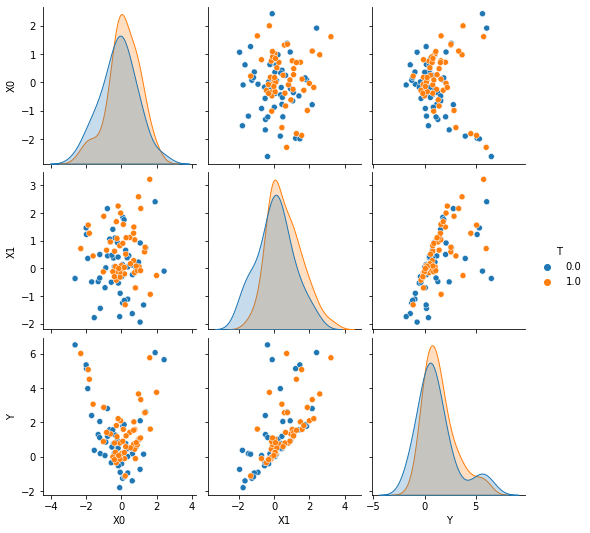

In [41]:
b = sns.pairplot(df, hue ="T")

In [42]:
from datetime import datetime


In [43]:
now = datetime.now()

In [44]:
now.strftime("%m-%d %H:%M:%S")

'07-07 14:30:38'

In [45]:
df_dict = {"weights" : weights_model.predict_proba(data_test.X)[:,1], "T" : data_test.T}

In [46]:
df = pd.DataFrame(df_dict)

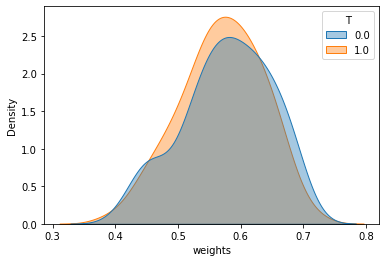

In [47]:
a = sns.kdeplot(data = df, x="weights", hue ="T",fill=True, alpha = 0.4)

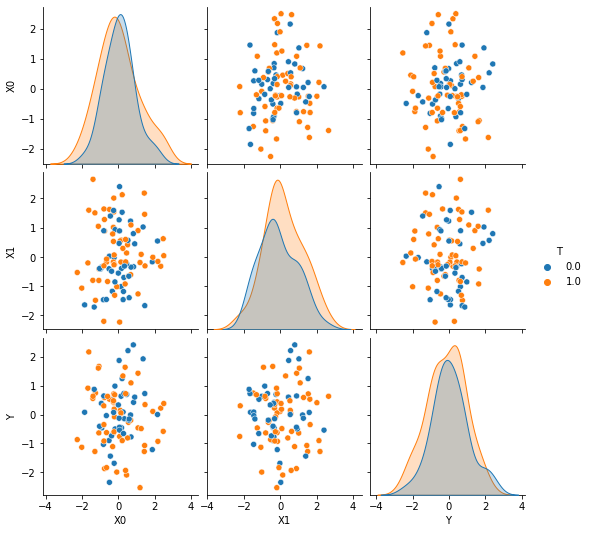

In [48]:
a = data_train.plot_data()

In [49]:
if "str":
    print("y")

y


In [50]:
a =[1,1]

In [51]:
if type(a) == list:
    print("y")

y


In [52]:
def linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample):

    alpha_vec = torch.tensor(alpha_vec).float()
    beta_vec = torch.tensor(beta_vec).float()

    d = len(alpha_vec)

    X = torch.randn((n_sample,d)).float()
    T = torch.bernoulli(torch.sigmoid( X @ alpha_vec ))
    
    if effect_var == "const":
        effect_vec = torch.ones(n_sample)

    if effect_var == "Ber":
        effect_vec = 2*torch.bernoulli(1/2*torch.ones(n_sample))-1

    if effect_var == "Unif":
        effect_vec = 2*torch.rand(n_sample)-1

    Y =  X @ alpha_vec + beta_scalar * effect_vec + noise_Y * torch.randn((n_sample))

    return Data_object(X,Y,T)

In [53]:
alpha_vec = [1,1]
beta_vec = [1,1]
beta_scalar = 1
effect_var = "Ber"
noise_Y = 1
n_sample = 100
a= linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)

In [54]:
a.Y

tensor([-0.9908, -4.0277, -1.0767, -0.4846, -1.7453,  2.4392,  1.8750,  1.9552,
        -0.1895, -1.3681, -2.4549, -0.1210, -1.7425,  0.9317, -4.0730,  4.2991,
        -1.0722, -2.9845,  0.4499, -1.4911, -0.2389,  0.1603,  0.2599,  1.0121,
        -0.3676,  0.3502, -0.9372, -1.3305, -1.8564, -1.2595,  0.3039, -0.4078,
        -0.8410,  0.2440,  4.4148, -2.2210,  3.3367,  1.2987, -2.2915, -0.9132,
        -1.4634, -0.6338, -0.4678,  2.3259, -0.2427,  0.3397, -1.2293, -0.1247,
        -1.4755, -0.7586, -1.8435,  3.9183,  1.6531,  2.3943, -2.0393, -4.9365,
         0.9621, -5.1216, -0.2050,  1.9936,  2.2572, -0.6312,  0.6045, -0.7383,
        -3.6227, -3.2610,  2.8284, -1.1344, -2.0429, -1.8529, -0.9699, -2.9092,
         1.3502, -0.6217, -2.1360, -1.6235,  1.2309, -0.4814,  2.7170,  0.5094,
        -3.8653,  3.8384, -1.9001,  1.3943,  1.8267,  1.3175,  0.9174, -0.6864,
        -0.8457,  0.7196, -3.1594, -2.1582,  2.9494, -0.2601,  1.8895,  0.2904,
        -0.6783, -0.1769, -0.1455, -0.00

In [55]:
alpha_vec = torch.tensor(alpha_vec).float()
beta_vec = torch.tensor(beta_vec).float()

d = len(alpha_vec)

X = torch.randn((n_sample,d)).float()
T = torch.bernoulli(torch.sigmoid( X @ alpha_vec ))

if effect_var == "const":
    effect_vec = torch.ones(d)

if effect_var == "Ber":
    effect_vec = 2*torch.bernoulli(1/2*torch.ones(n_sample))-1

if effect_var == "Unif":
    effect_vec = 2*torch.rand(d)-1

Y =  X @ alpha_vec + beta_scalar * effect_vec + noise_Y * torch.randn((n_sample))


In [56]:
def cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param):
        
        K = ker(X_ker)
        L = ker(Y_ker)

        W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),reg_param,"cme")
        W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),reg_param,"cme")

        val_stat_0 = torch.trace(L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0)))+ (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0)))))))
        val_stat_1 = torch.trace(L(data_val.Y1,data_val.Y1) -2 * K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_val.Y1)))+ (K(data_train.X1,data_val.X1).T @ (W0 @ (L(data_train.Y1,data_train.Y1)@ (W0 @ (K(data_train.X1,data_val.X1)))))))
        val_stat = val_stat_0+val_stat_1
        return val_stat

In [57]:
def cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param):
        
        K = ker(X_ker)
        L = ker(Y_ker)

        W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),reg_param,"cme")
        W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),reg_param,"cme")

        val_stat_0 = torch.trace(L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0))) + (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0)))))))
        val_stat_1 = torch.trace(L(data_val.Y1,data_val.Y1) -2 * K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_val.Y1))) + (K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_train.Y1)@ (W1 @ (K(data_train.X1,data_val.X1)))))))
        val_stat = val_stat_0+val_stat_1
        return val_stat

In [58]:
data_train = linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)
data_val = linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)
cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param=1)

/var/folders/3k/2lkktjyj2r74wt_611v45qs00000gn/T/ipykernel_99497/3842994627.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha_vec = torch.tensor(alpha_vec).float()
/var/folders/3k/2lkktjyj2r74wt_611v45qs00000gn/T/ipykernel_99497/3842994627.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta_vec = torch.tensor(beta_vec).float()


tensor(99.8179, grad_fn=<AddBackward0>)

In [59]:
K = ker(X_ker)
L = ker(Y_ker)
W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),1,"cme")
W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),1,"cme")

In [60]:
L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0)))+ (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0))))))

tensor([[ 9.9815e-01, -1.4723e-04,  1.0711e-02,  ...,  1.3504e-01,
          7.7054e-01,  8.9886e-01],
        [-1.4574e-03,  9.9941e-01, -1.5248e-03,  ...,  2.4461e-04,
         -1.1915e-03, -1.2630e-03],
        [ 1.0548e-02, -1.1109e-04,  9.9701e-01,  ..., -1.0821e-03,
         -8.5351e-04,  8.2724e-04],
        ...,
        [ 1.3302e-01,  7.1482e-04, -8.3436e-04,  ...,  9.9843e-01,
          4.3884e-01,  3.0265e-01],
        [ 7.6978e-01, -1.8283e-04, -1.7140e-03,  ...,  4.4096e-01,
          9.9832e-01,  9.6458e-01],
        [ 8.9923e-01, -1.1820e-03,  2.4158e-03,  ...,  3.0428e-01,
          9.6516e-01,  9.9880e-01]], grad_fn=<AddBackward0>)

In [61]:
from torch.autograd import Variable
from qpth.qp import QPFunction

def kernel_mean_matching(kernel_X, X0, X1 , eps=1, B=10 ):
    '''
    An implementation of Kernel Mean Matching, note that this implementation uses its own kernel parameter
    References:
    1. Gretton, Arthur, et al. "Covariate shift by kernel mean matching." 
    2. Huang, Jiayuan, et al. "Correcting sample selection bias by unlabeled data."
    
    :param X1: two dimensional sample from population 1
    :param X2: two dimensional sample from population 2
    :param kern: kernel to be used, an instance of class Kernel in kernel_utils
    :param B: upperbound on the solution search space 
    :param eps: normalization error
    :return: weight coefficients for instances x1 such that the distribution of weighted x1 matches x2
    '''
    n0 = X0.shape[0]
    n = X1.shape[0]
    G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
    h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
    e = Variable(torch.Tensor())
    K_mat = kernel_X(X0, X0)
    kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      
    
    coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)
        
    return coef

In [62]:
X0 = data_train.X0
X1 = data_train.X
eps = 0.01
B=10
n0 = X0.shape[0]
n = X1.shape[0]
G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
e = Variable(torch.Tensor())
K_mat = K(X0, X0)

kappa = torch.sum(K(X0, X1), axis=1) * float(n0) / float(n-n0)      

coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)

/opt/miniconda3/lib/python3.8/site-packages/qpth/qp.py:83: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:3427.)
  e, _ = torch.eig(Q[i])


In [63]:
coef

tensor([[-4.6245e-07,  1.1477e+00,  9.2280e-06, -3.5754e-06, -6.4666e-07,
          1.6383e-06, -1.6106e-06,  1.6461e-07,  4.3989e+00, -1.0424e-06,
         -1.7900e-07, -1.8390e-06,  9.5549e-07,  4.7654e-05,  1.0904e-04,
          6.1015e-01, -7.3883e-07,  1.4457e-05, -1.6476e-06,  5.2482e-06,
          4.1501e+00, -5.0774e-06,  2.9158e+00, -1.6795e-06,  6.3496e-07,
          2.6627e+00,  1.9066e-01,  8.5740e-05,  2.9337e+00,  3.5400e+00,
          6.5043e+00,  2.6012e-06,  2.4482e-06, -7.0855e-08,  3.8608e+00,
          7.5602e-07,  2.4145e+00, -5.2612e-08,  9.0100e-07,  9.8484e-07,
         -4.8311e-07,  1.1199e-02,  1.7477e-06,  6.3555e-07,  5.4347e+00,
         -5.8812e-07,  1.8290e-07,  6.2129e+00,  1.2052e+00,  1.7415e-06,
          2.9578e-06,  5.3365e+00, -2.0693e-05]],
       grad_fn=<QPFunctionFnBackward>)

In [65]:
n0 = X0.shape[0]
n = X1.shape[0]
kernel_X = K
G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
e = Variable(torch.Tensor())
K_mat = kernel_X(X0, X0)
kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      

coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)

In [ ]:
def kernel_mean_matching(kernel_X, X0, X1 , eps=1, B=10 ):
    '''
    An implementation of Kernel Mean Matching, note that this implementation uses its own kernel parameter
    References:
    1. Gretton, Arthur, et al. "Covariate shift by kernel mean matching." 
    2. Huang, Jiayuan, et al. "Correcting sample selection bias by unlabeled data."
    
    :param X1: two dimensional sample from population 1
    :param X2: two dimensional sample from population 2
    :param kern: kernel to be used, an instance of class Kernel in kernel_utils
    :param B: upperbound on the solution search space 
    :param eps: normalization error
    :return: weight coefficients for instances x1 such that the distribution of weighted x1 matches x2
    '''
    n0 = X0.shape[0]
    n = X1.shape[0]
    G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
    h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
    e = Variable(torch.Tensor())
    K_mat = kernel_X(X0, X0)
    kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      
    
    coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)
        
    return coef

In [68]:
kernel_mean_matching(X_ker, X0, X1 , eps=100, B=10000)

TypeError: sum() got an unexpected keyword argument 'axis'

In [67]:
KMM_weights_for_W_matrix(X_ker,X0,X1,KMM_weights = True)

TypeError: 'Tensor' object is not callable